<a href="https://colab.research.google.com/github/onativo/DataScience101/blob/main/python_data_science_cap07_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/tempo_salarios.csv')

In [ ]:
copas = pd.Series([1952, 1962, 1970, 1994, 2002])

In [ ]:
print(f'{copas}')

0    1952
1    1962
2    1970
3    1994
4    2002
dtype: int64


In [ ]:
s = pd.Series({'a': 1, 'b': 2, 'c': 3})
print(f'tipo da variavel: {type(s)}')

tipo da variavel: <class 'pandas.core.series.Series'>


In [ ]:
s = pd.Series(['wes mackinney', 'criador do pandas'], index = ['pessoa', 'quem'])
print(s)

pessoa        wes mackinney
quem      criador do pandas
dtype: object


In [ ]:
df.loc[df.Salario > 83000]
#localiza salarios maiores que 83000 usando o .loc()

In [ ]:
df.iloc[0:15, :2]
#fatiando o df de acordo com: [n_linhas, n_colunas] usando .iloc()
#o mesmo que df.iloc[:15, :2]

In [ ]:
df.iloc[:30, :1].values
#retornando um array Numpy usando o iloc()

transportes.csv ↓
adicionando index à uma coluna

In [ ]:
transportes = pd.read_csv('transportes.csv', index_col=0)
transportes.describe
#usando index_col=0 para especificar qual coluna sera usada como índice

<bound method NDFrame.describe of               Velocidade   Peso  Consumo  Autonomia      Valor
Tipo                                                          
Motocicleta          120    116     41.0        656      25000
Automóvel            140   2000     15.0        800      55000
Helicóptero          280    450      5.0       1262    7000000
Avião                900  28000      0.3      12000  112000000
Motoplanador         200    322     18.0       1200     150000
Bicicleta             30     11      0.0        100        700>

In [ ]:
transportes.loc['Avião']

Velocidade          900.0
Peso              28000.0
Consumo               0.3
Autonomia         12000.0
Valor         112000000.0
Name: Avião, dtype: float64

de volta ao tempo_salarios_csv ↓


In [ ]:
df2 = pd.read_csv('tempo_salarios2.csv')
df2.isna()
#isna() retorna True se o valor for NotAvailable

In [ ]:
df2.describe()

,AnosdeExperiencia,Salario
count,29.000000,27.000000
mean,5.393103,74454.518519
std,2.853686,27444.112683
min,1.100000,37731.000000
25%,3.200000,56218.000000
50%,4.900000,64445.000000
75%,7.900000,99787.500000
max,10.500000,122391.000000


In [ ]:
df2_completo = df2.fillna(df2.median())
df2_completo
#usando median() dentro do fillna() para completar campos NaN

In [ ]:
df.describe()
  

,AnosdeExperiencia,Salario
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df2_completo.describe()

,AnosdeExperiencia,Salario
count,30.000000,30.000000
mean,5.376667,73453.566667
std,2.805497,26164.714716
min,1.100000,37731.000000
25%,3.325000,56720.750000
50%,4.900000,64445.000000
75%,7.700000,97189.750000
max,10.500000,122391.000000


In [ ]:
df2_completo = df2.fillna(df2.interpolate())
df2_completo.describe()

,AnosdeExperiencia,Salario
count,30.000000,30.000000
mean,5.315000,75933.216667
std,2.836497,27120.075336
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df.describe()

pivotando o dataframe

In [ ]:
#criando um dataFrame manualmente
manual_df = pd.DataFrame({'Nome': ['Alice', 'Alice', 'Alice', 'Roberto', 'Roberto', 'Roberto'],
                          'Idade': ['19', '22', '32', '19', '22', '32'],
                          'ID': [1,2,3,4,5,6],
                          'Cursos': ['Direito', 'Administração', 'Matemática', 'Arquitetura', 'Design', 'Engenharia']})
manual_df

,Nome,Idade,ID,Cursos
0,Alice,19,1,Direito
1,Alice,22,2,Administração
2,Alice,32,3,Matemática
3,Roberto,19,4,Arquitetura
4,Roberto,22,5,Design
5,Roberto,32,6,Engenharia


In [ ]:
manual_df.pivot(index = 'Nome', columns = 'Idade', values = 'ID')

Idade,19,22,32
Nome,,,
Alice,1,2,3
Roberto,4,5,6


In [ ]:
manual_df.pivot(index = 'Cursos', columns = 'Nome', values = ['ID', 'Idade'])

ID         Idade        
Nome          Alice Roberto Alice Roberto
Cursos                                   
Administração     2     NaN    22     NaN
Arquitetura     NaN       4   NaN      19
Design          NaN       5   NaN      22
Direito           1     NaN    19     NaN
Engenharia      NaN       6   NaN      32
Matemática        3     NaN    32     NaN

eliminando valores nulos

In [ ]:
df = pd.read_csv('transportes.csv')
print('antes da alteração')
print(df)

antes da alteração
           Tipo  Velocidade   Peso  Consumo  Autonomia      Valor
0   Motocicleta         120    116     41.0        656      25000
1     Automóvel         140   2000     15.0        800      55000
2   Helicóptero         280    450      5.0       1262    7000000
3         Avião         900  28000      0.3      12000  112000000
4  Motoplanador         200    322     18.0       1200     150000
5     Bicicleta          30     11      0.0        100        700


In [ ]:
print('excluindo linhas 3 e 5')
df = df.drop([3,5])
print(df)

excluindo linhas 3 e 5
           Tipo  Velocidade  Peso  Consumo  Autonomia    Valor
0   Motocicleta         120   116     41.0        656    25000
1     Automóvel         140  2000     15.0        800    55000
2   Helicóptero         280   450      5.0       1262  7000000
4  Motoplanador         200   322     18.0       1200   150000


In [ ]:
print('excluindo coluna autonomia')
df = df.drop('Autonomia', axis = 1)
print(df)

excluindo coluna autonomia
           Tipo  Velocidade  Peso  Consumo    Valor
0   Motocicleta         120   116     41.0    25000
1     Automóvel         140  2000     15.0    55000
2   Helicóptero         280   450      5.0  7000000
4  Motoplanador         200   322     18.0   150000


In [ ]:
print('excluindo duas colunas pelo nome')
df = df.drop(['Peso', 'Consumo'], axis = 1)
print(df)

excluindo duas colunas pelo nome
           Tipo  Velocidade    Valor
0   Motocicleta         120    25000
1     Automóvel         140    55000
2   Helicóptero         280  7000000
4  Motoplanador         200   150000


,Tipo,Velocidade,Valor
0,Motocicleta,120,25000
1,Automóvel,140,55000
2,Helicóptero,280,7000000
4,Motoplanador,200,150000


In [ ]:
cubo = lambda x: x**3

In [ ]:
print(cubo(2))

8


plotando grafico com o Pandas

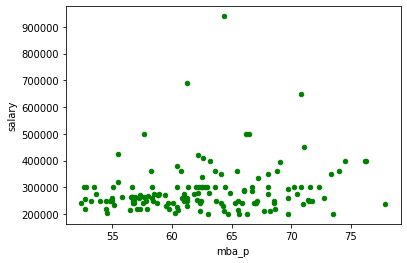

In [ ]:
df_plot = pd.read_csv('placement.csv')
df_plot.plot(kind = 'scatter', x = 'mba_p', y = 'salary', color='green')

plotando grafico de barras

In [ ]:
df_bars = pd.DataFrame({'nome':['‘João’','’Maria’','’Pedro’','’Roberto’','’William’', '‘Elizabeth’','’José’'],
                             'idade':[23,78,22,19,45,33,20],
                             'sexo':['‘M’','’F’','’M’','’M’','’M’','’F’','’M’'],
                             'peso':[65, 70, 88, 102, 57, 49, 80]
})

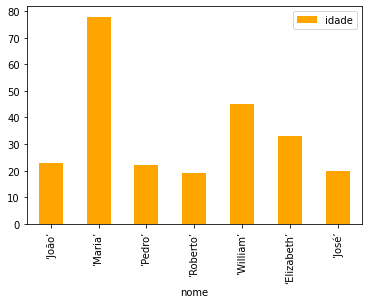

In [ ]:
df_bars.plot(kind='bar', x = 'nome', y = 'idade', color = 'orange')